<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/Practice_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data into the correct format

## create TF dataset

In [1]:
#imports
#DATA DOWNLOAD
#TODO load data from folders
#DATA LOAD hint: https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/04_Transfer_Learning.ipynb
#DATA PREPROCESS

In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
from pathlib import Path

_URL = 'https://github.com/ML-Bioinfo-CEITEC/ECCB2021/raw/main/data/intergenic_vs_coding_20000_seqs.zip'
PATH = Path('/content/datasets/dna_dataset')
with urlopen(_URL) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
      zfile.extractall(PATH)

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_dset = tf.keras.preprocessing.text_dataset_from_directory(PATH/'intergenic_vs_coding_10000_seqs'/'train', batch_size=32)
valid_dset = tf.keras.preprocessing.text_dataset_from_directory(PATH/'intergenic_vs_coding_10000_seqs'/'valid', batch_size=32)


Found 18335 files belonging to 2 classes.
Found 1665 files belonging to 2 classes.


In [4]:
for x,y in train_dset.take(1):
  print(x)
  print(y)

tf.Tensor(
[b'CTGGGGGAAGGTGGAGGCTGACATCCCAGGCCATGGGCAGGAAGTCCTCATCAGGCTCTTTAAGGGTCACCCAGAGACTCTGGAGAAGTTTGACAAGTTCAAGCACCTGAAGTCAGAGGACGAGATGAAGGCGTCTGAGGACTTAAAGAAGCATGGTGCCACCGTGCTCACCGCCCTGGGTGGCATCCTTAAGAAGAAGG'
 b'CTTTCTGTGACGGGTGTTGACAAAGAGATGATGCAAAGAATTAGAGAAAAATCTATTTTACAAGCACAAGAGAGAGCAAAAGAAGCTACAGAAGCAAAAGCTGCAGCAAAGCGGGAAGATCAAAAATACGCACTAAGTGTCATGATGAAGATTGAAGAAGAAGAGAGGAAAAAAATAGAAGATATGAAAGAAAATGAACG'
 b'CCACCCTAACATGCATTATGCAGTTGCTCGGCGCATTTCCTTCACCTAGTGGTCCTGCCTCTCCTTGTAGTCTTGTGAATGAGACCACTTTGATTAAATACTCCAGGCTGCCAACCATAAACAAGCATAGTTTCCGGTACTTTGTCTTGGATAACAGTGTCATCCTGGCAATGCTGGAACAACCTCTTGGAAATGAGCAG'
 b'ATCATTTGAACTTGATTTCATCTGGATAAATATGTGAGGAGGAGCAGGGGAGGAAGAGACGGGCAAAGAGGCCTCTGTGCCCTTTAGGGAGTGGGGTGCAGTGTAGTAGCAGATGGAGCCCAGCTGTGCTCCAGGCAGAGCTGGGTTCAAATCCTGGTTCAGCCACTTGCTCTCTGTTTAGCTGCGAGTTCACCACTTAC'
 b'AGCCCTGGACCTTCGTGGTTGTGAAGGACCCAGACGTGAAGCACAAGATTCGAAAGATCATTGAGGAGGAAGAGGAGATCAACTACATGAAAAGGATGGGACATCGCTGGGTCACAGACCTCAAGAAACTGAGAACCAACTGGATTAAAGAGTACTTGGATACTGC

## numerlicalization


In [5]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

train_text = train_dset.map(lambda x, y: x)

def char_split(input_data):
  return tf.strings.unicode_split(input_data, 'UTF-8')

vectorize_layer = TextVectorization(output_mode='int', split=char_split, ngrams=3)
vectorize_layer.adapt(train_text)
print(len(vectorize_layer.get_vocabulary()))
print(vectorize_layer.get_vocabulary())



86
['', '[UNK]', 'a', 't', 'g', 'c', 'a a', 't t', 't g', 'c a', 'a g', 'c t', 'g a', 'a t', 'c c', 'g g', 't c', 'g c', 'a c', 't a', 'g t', 'a a a', 't t t', 'c a g', 'c t g', 'a g a', 'g a a', 't g g', 'a a g', 'c g', 'c c a', 'g g a', 'g a g', 't g a', 't c t', 'c c t', 'a c a', 't c a', 'c a a', 'a a t', 'a t t', 'a g g', 't t c', 'a t g', 'c t t', 't g t', 'a g c', 'c a t', 'c t c', 't t g', 'g c a', 't g c', 'g t g', 'g c t', 't c c', 'g c c', 'c c c', 'g g c', 'c a c', 't a t', 'g g g', 'a c t', 'a g t', 'a t a', 'a a c', 't t a', 'a c c', 'g a t', 't a a', 'a t c', 'g t t', 'g a c', 'g g t', 'c t a', 't a c', 'g t c', 't a g', 'g t a', 'c g g', 'c c g', 'c g c', 'g c g', 'c g a', 'a c g', 't c g', 'c g t']


In [6]:
model = tf.keras.Sequential([vectorize_layer])
res = model.predict(train_dset.take(1))
print(res)
print(res.shape)


[[ 5  2  5 ... 69 37 47]
 [ 2  3  4 ... 23 62 52]
 [ 2  5  5 ... 80 81 78]
 ...
 [ 2  3  4 ... 50 23 41]
 [ 2  2  3 ... 22 22 22]
 [ 2  2  5 ... 61 44 65]]
(32, 597)


# Define neural network model

In [7]:
vocab_size = len(vectorize_layer.get_vocabulary())
embedding_dim = 64
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#possible improvements
# Adjust layers, number of neurons, correct activation function
#LSTM layer - change parameters
# add augmentations layer, embedding layer, split into different tokens (not only letters), dropout


# Train the model

In [8]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_dset, epochs=5, validation_data=valid_dset)

#possible improvements
# change number of epochs, learning rate (if training is unstable), increase data amount

Epoch 1/5
573/573 [==============================] - 26s 32ms/step - loss: 0.4672 - accuracy: 0.7841 - val_loss: 0.4783 - val_accuracy: 0.8336
Epoch 2/5
573/573 [==============================] - 18s 31ms/step - loss: 0.4144 - accuracy: 0.8105 - val_loss: 0.3101 - val_accuracy: 0.8763
Epoch 3/5
573/573 [==============================] - 17s 30ms/step - loss: 0.3391 - accuracy: 0.8586 - val_loss: 0.3082 - val_accuracy: 0.8799
Epoch 4/5
573/573 [==============================] - 18s 31ms/step - loss: 0.3253 - accuracy: 0.8651 - val_loss: 0.3520 - val_accuracy: 0.8595
Epoch 5/5
573/573 [==============================] - 18s 32ms/step - loss: 0.3294 - accuracy: 0.8647 - val_loss: 0.2871 - val_accuracy: 0.8883


# Evaluate

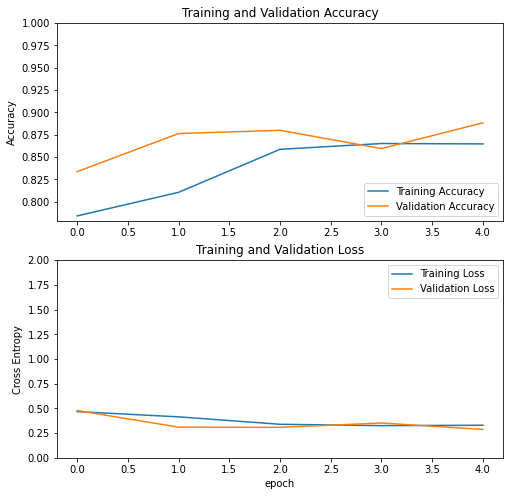

In [10]:
def plot_metrics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

plot_metrics(history)